In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, ifft
from tqdm.notebook import tqdm
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter

# compréhension des données

[[9.90000000e+01 3.36000000e+02 6.72000000e+02 1.01100000e+03
  1.68200000e+03]
 [3.53411074e+07 3.40220039e+07 2.43813362e+07 1.92976839e+07
  1.20814016e+07]]


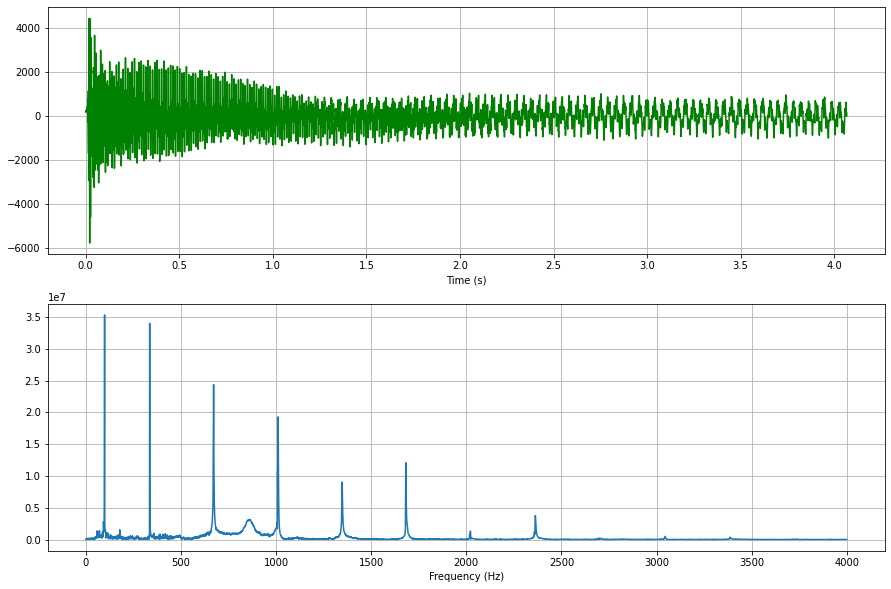

In [2]:
#gérer différences stéréo - mono, ramène tous les audios en mono
def mono_stereo(data):
    if len(data.shape) == 2 :
        data_c = np.zeros((data.shape[0], 1))
        data_c = (data[:,0]+data[:,1])/2
        return data_c
    return data
    
samplerate, data = wavfile.read('./data/wav/Mi1/Mi15.wav')
length = data.shape[0]/samplerate
time = np.linspace(0., length, data.shape[0])

fig1 = plt.figure(1, figsize=(15, 10))

plt.subplot(2,1,1), plt.grid(), plt.xlabel("Time (s)"), plt.plot(time, data[:], 'g')

y = fft(data[:])
y = y[0: int(len(y)/2)]
mod_fft_y = abs(y)
plt.subplot(2,1,2), plt.grid(), plt.plot(mod_fft_y[0:4000]), plt.xlabel('Frequency (Hz)')
            
#recuperation des harmoniques
def harmonique(nb_hamrmonique=4, mod_fft=np.array([])):
    RSE_min = 0.27e+7
    list_harmonique = np.zeros((2,nb_hamrmonique))
    for k in range(nb_hamrmonique):
        #if np.max(mod_fft) > RSE_min:
            list_harmonique[0,k] = np.argmax(mod_fft)
            list_harmonique[1,k] = np.max(mod_fft)
            mod_fft[np.argmax(mod_fft)-40:np.argmax(mod_fft)+40] = 0
        #else:
            #print('Rapport signal sur bruit trop faible, harmonique pas assez signifiante.',k+1,'eme potentielle harmonique.')
    return list_harmonique

lst = harmonique(5, mod_fft_y)
print(lst)

# Affichage des spectres des données pour Mi1

  0%|          | 0/10 [00:00<?, ?it/s]

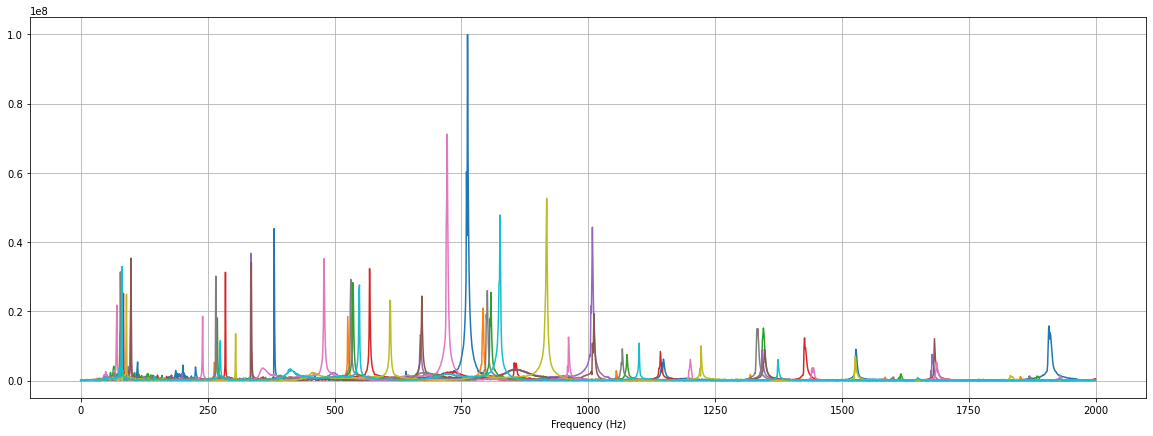

In [3]:
fig2 = plt.figure(2, figsize=(20,7))
plt.grid()
for k in tqdm(range(10)):
    k = str(k)
    path = f'./data/wav/Mi1/Mi1{k}.wav'
    samplerate, data = wavfile.read(path)
    data = mono_stereo(data)
    mod_fft_y = abs(fft(data))   
    plt.plot(mod_fft_y[0:2000]), plt.xlabel("Frequency (Hz)")


# Influence de la longueur du signal sur le spectre

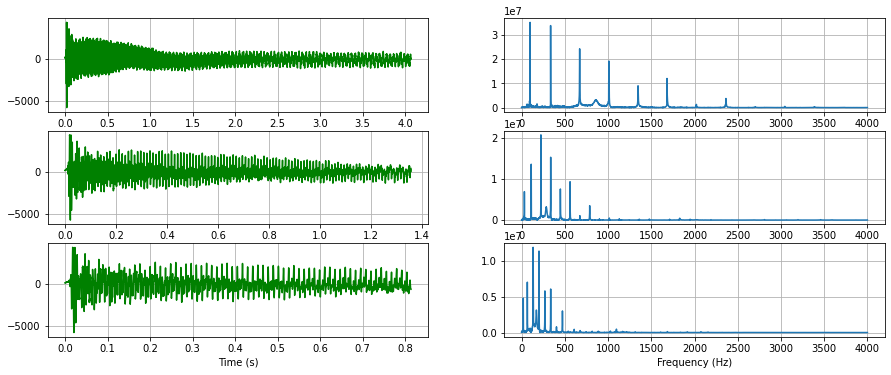

In [4]:
N=6
for k in range(1,N,2):
    samplerate, data = wavfile.read('./data/wav/Mi1/Mi15.wav')

    data = data[0:int(len(data)/k)]

    length = data.shape[0]/samplerate
    time = np.linspace(0., length, data.shape[0])

    fig3 = plt.figure(3, figsize=(15, 10))

    plt.subplot(N-1,2,k), plt.grid(), plt.xlabel("Time (s)"), plt.plot(time, data[:], 'g')

    y = fft(data[:])
    y = y[0: int(len(y)/2)]
    mod_fft_y = abs(y)
    plt.subplot(N-1,2,k+1), plt.grid(), plt.plot(mod_fft_y[0:4000]), plt.xlabel("Frequency (Hz)")

Compression temporelle = dilatation fréquentielle et inversement. 
Il faut donc égaliser les longueurs des signaux temporels pour permettre une comparaison pertinente.

  0%|          | 0/10 [00:00<?, ?it/s]

load ./data/wav/Fa1/Fa10.wav
valeur initiale du temps : 3.9009297052154195
valeur finale du temps : 2.51

 [[4.37000000e+02 1.10254000e+05 6.10000000e+01 1.10630000e+05]
 [2.72400888e+07 2.72400888e+07 2.43371264e+07 2.43371264e+07]] 

load ./data/wav/Fa1/Fa11.wav
valeur initiale du temps : 3.8545124716553287
valeur finale du temps : 2.51

 [[4.39000000e+02 1.10252000e+05 6.10000000e+01 1.10630000e+05]
 [1.72434747e+07 1.72434747e+07 1.70414718e+07 1.70414718e+07]] 

load ./data/wav/Fa1/Fa12.wav
valeur initiale du temps : 4.411768707482993
valeur finale du temps : 2.51

 [[4.42000000e+02 1.10249000e+05 2.21000000e+02 1.10470000e+05]
 [5.03041792e+07 5.03041792e+07 2.52891394e+07 2.52891394e+07]] 

load ./data/wav/Fa1/Fa13.wav
valeur initiale du temps : 3.9473696145124717
valeur finale du temps : 2.51

 [[4.41000000e+02 1.10250000e+05 2.21000000e+02 1.10470000e+05]
 [5.59110400e+07 5.59110400e+07 2.26544847e+07 2.26544847e+07]] 

load ./data/wav/Fa1/Fa14.wav
valeur initiale du temps : 4

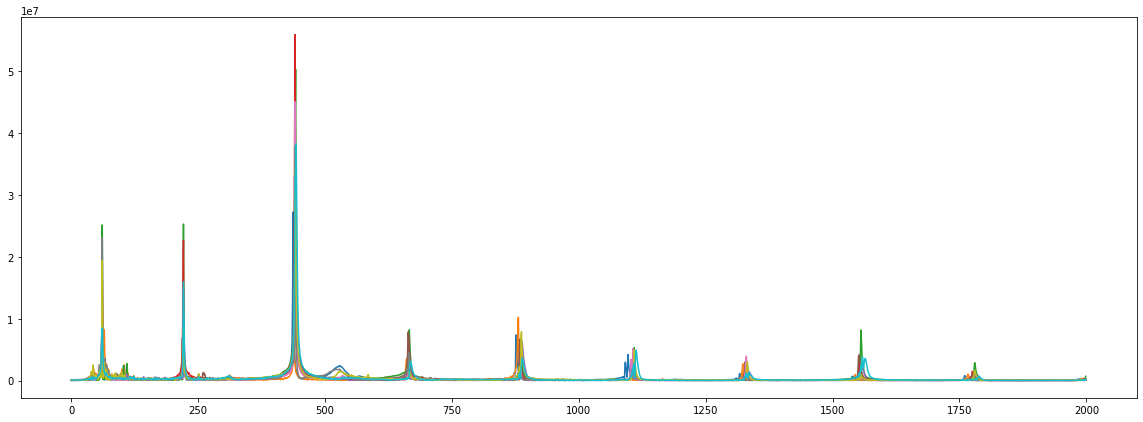

In [5]:
#On prendra tmax = 2.5 s.

for k in tqdm(range(10)):
    k = str(k)
    path = f'./data/wav/Fa1/Fa1{k}.wav'
    print('load', path)
    samplerate, data = wavfile.read(path)
    data = mono_stereo(data)
    
    length = data.shape[0]/samplerate
    print('valeur initiale du temps :',length)
    eps = 0.01
    real_length = 2.5
    while abs(length-real_length)>eps:
        data[-1]
        data = np.delete(data, -1)
        length = data.shape[0]/samplerate
    print('valeur finale du temps :',length)
    mod_fft_y = abs(fft(data))
    
    fig4 = plt.figure(4, figsize=(20,7)), plt.grid()
    
    plt.plot(mod_fft_y[0:2000])
    lst = harmonique(4, abs(fft(data)))
    print('\n',lst,'\n')

# Chargement des données

In [6]:
#calcul du module de la fft de note 'note' et de la donnée 'i'
def load_fft(note, i):
    path = f'./data/wav/{note}/{note}{str(i)}.wav'
    samplerate, data = wavfile.read(path)
    data = mono_stereo(data)
    length = data.shape[0]/samplerate
    eps = 0.01
    real_length = 2.5
    while abs(length-real_length)>eps:
        data[-1]
        data = np.delete(data, -1)    
        length = data.shape[0]/samplerate
    return abs(fft(data))            

#charge la liste des harmoniques
def load_data():
    lst_harm = []
    lst_notes = ['Mi1','Fa1','Fa#1','Sol1','Sol#1','La1','La#1','Si1','Do2','Do#2','Re2','Re#2']
    for i in tqdm(range(12)):
        for j in range(10):
            lst_harm.append(harmonique(4,load_fft(lst_notes[i], j)))
    for k in range(len(lst_harm)):
        lst_harm = np.array(lst_harm)
        lst_harm[k,0,:] = np.sort(lst_harm[k,0,:])
    return lst_harm

# Affichage des spectres des notes allant de Mi1 à Ré#2

  0%|          | 0/12 [00:00<?, ?it/s]

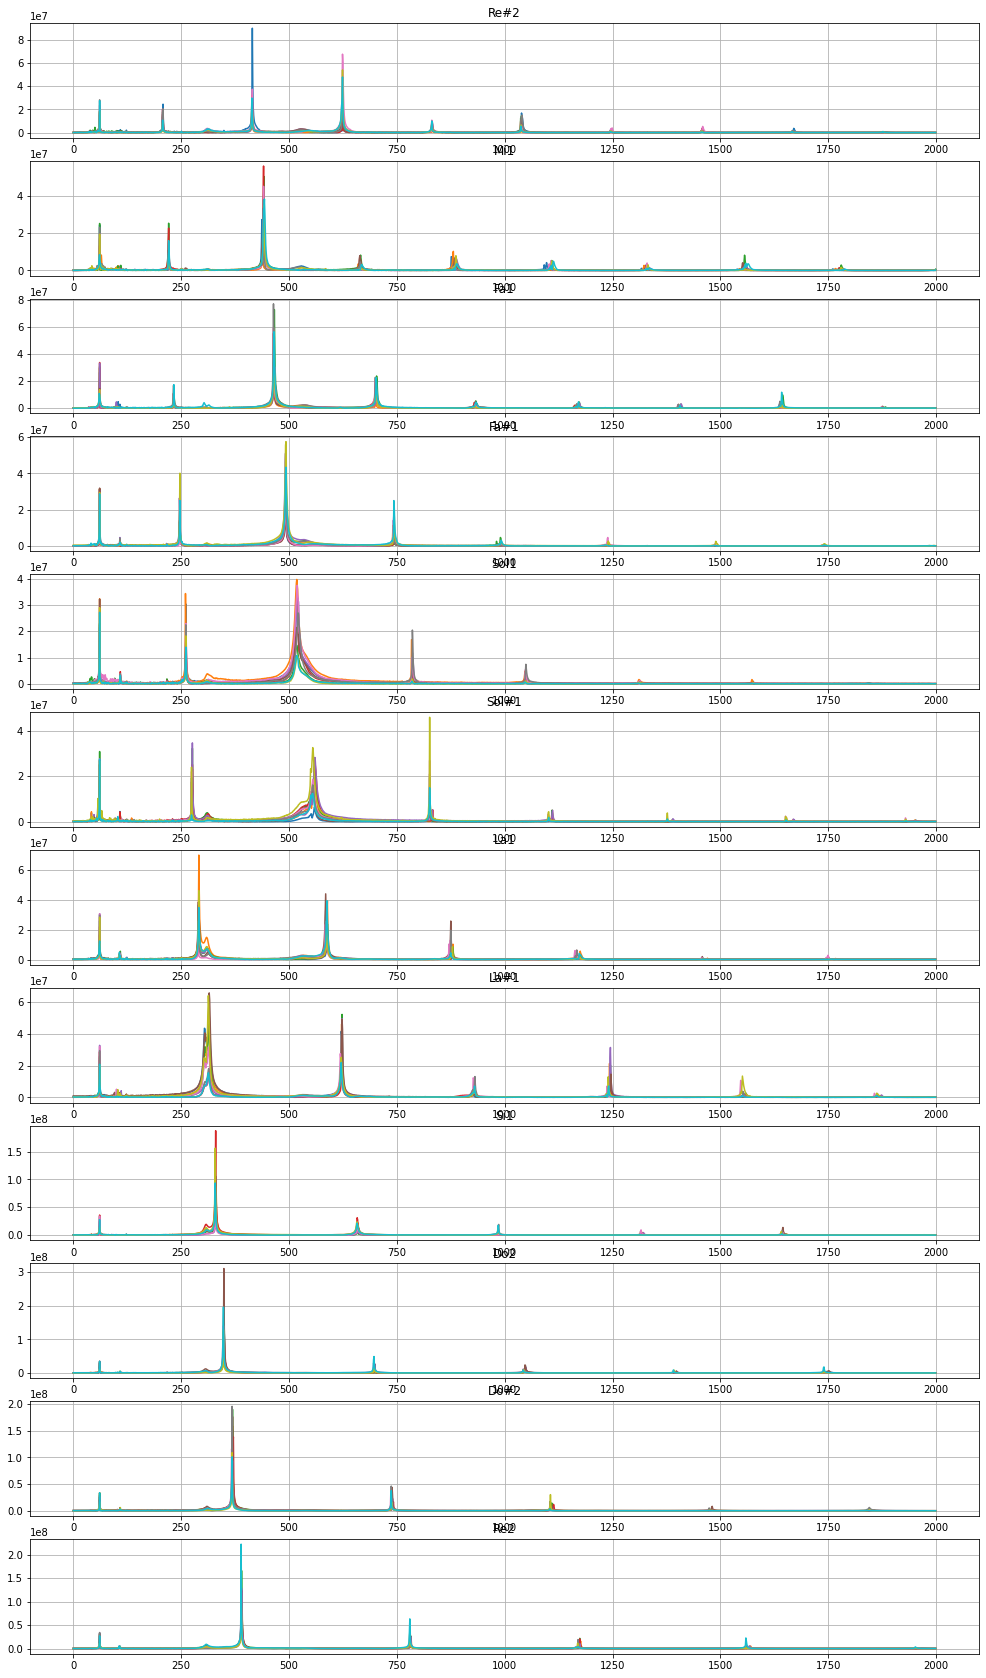

In [7]:
def display_spectres(note):
    for k in range(10):
        mod_fft_y = load_fft(note, k)
        plt.plot(mod_fft_y[0:2000])

lst_notes = ['Mi1','Fa1','Fa#1','Sol1','Sol#1','La1','La#1','Si1','Do2','Do#2','Re2','Re#2']

for i in tqdm(range(len(lst_notes))):
    fig6 = plt.figure(6, figsize=(17,30))
    plt.subplot(len(lst_notes), 1, i+1), plt.title(lst_notes[i-1]), plt.grid()
    display_spectres(lst_notes[i])

On peut noter la récurrence du pic aux alentours de 50/60 Hz qui correspond au bruit ambiant lors de l'enregistrement.

In [8]:
lst_harmoniques = []
for i in tqdm(range(len(lst_notes))):
    for k in range(10):
        k = str(k)
        path = f'./data/wav/{lst_notes[i]}/{lst_notes[i]}{k}.wav'
        samplerate, data = wavfile.read(path)
        data = mono_stereo(data)
        length = data.shape[0]/samplerate
        eps = 0.01
        real_length = 2.5
        while abs(length-real_length)>eps:
            data[-1]
            data = np.delete(data, -1)
            length = data.shape[0]/samplerate
        mod_fft_y = abs(fft(data))
        mod_fft_y = mod_fft_y[0: int(len(mod_fft_y)/2)]

        lst_harmoniques.append(harmonique(4, mod_fft_y))

  0%|          | 0/12 [00:00<?, ?it/s]

# kNN from scratch

In [9]:
print(np.array(lst_harmoniques).shape)
lst_harmoniques

lst_harm = load_data()

labels = np.zeros((1,120))
for k in range(12) : labels[0,k*10:(k*10)+10] = k

def dist_eucl(x,y):
    s=0
    for i in range(len(x)):
        s+=(x[i]-y[i])**2
    return np.sqrt(s)


path = f'./data/wav/Fa1/Fa12.wav'
samplerate, data = wavfile.read(path)
data = mono_stereo(data)
length = data.shape[0]/samplerate
eps = 0.01
real_length = 2.5
while abs(length-real_length)>eps:
    data[-1]
    data = np.delete(data, -1)    
    length = data.shape[0]/samplerate

mod_fft_y = abs(fft(data))
x = harmonique(4, mod_fft_y[:int(len(mod_fft_y)/2)])
x = np.sort(x[0])

lst_dist_eucl = []
for k in range(len(lst_harmoniques)):
    lst_harmoniques = np.array(lst_harmoniques)
    lst_harmoniques[k,0,:] = np.sort(lst_harmoniques[k,0,:])
    lst_dist_eucl.append(dist_eucl(x, lst_harmoniques[k,0,:]))


def knn(k, lst_dist, labels):
    lst_min_indices = []
    for i in range(k):
        m = np.argmin(lst_dist)
        lst_dist[np.argmin(lst_dist)] = np.max(lst_dist)
        lst_min_indices.append(labels[0,m])
    l = np.array(Counter(lst_min_indices).most_common())
    return lst_min_indices, int(l[0][0])
        
print(knn(4, lst_dist_eucl, labels))


(120, 2, 4)


  0%|          | 0/12 [00:00<?, ?it/s]

([1.0, 1.0, 1.0, 1.0], 1)


In [10]:
print(lst_harmoniques[0], '\n', lst_harm[0])

[[2.08000000e+02 4.15000000e+02 8.32000000e+02 1.03900000e+03]
 [8.98474127e+07 2.44855981e+07 1.68535704e+07 9.50740380e+06]] 
 [[2.08000000e+02 4.15000000e+02 1.20065000e+05 1.20272000e+05]
 [8.98474127e+07 8.98474127e+07 2.44855981e+07 2.44855981e+07]]


In [11]:
#précision
lst_notes = ['Mi1','Fa1','Fa#1','Sol1','Sol#1','La1','La#1','Si1','Do2','Do#2','Re2','Re#2']
t = 0

for i in tqdm(range(12)):
    for j in range(10):
        path = f'./data/wav/{lst_notes[i]}/{lst_notes[i]}{j}.wav'
        samplerate, data = wavfile.read(path)
        data = mono_stereo(data)
        length = data.shape[0]/samplerate
        eps = 0.01
        real_length = 2.5
        while abs(length-real_length)>eps:
            data[-1]
            data = np.delete(data, -1)    
            length = data.shape[0]/samplerate

        mod_fft_y = abs(fft(data))
        
        x = harmonique(4, mod_fft_y[:int(len(mod_fft_y)/2)])
        x = np.sort(x[0])

        lst_dist_eucl = []
        for k in range(len(lst_harmoniques)):
            lst_harmoniques = np.array(lst_harmoniques)
            lst_harmoniques[k,0,:] = np.sort(lst_harmoniques[k,0,:])
            lst_dist_eucl.append(dist_eucl(x, lst_harmoniques[k,0,:]))
        
        lm, res = knn(4, lst_dist_eucl, labels)
        if res == labels[0,i*10]:
            t += 1

print('précsion =', (t/120)*100, '%')


  0%|          | 0/12 [00:00<?, ?it/s]

précsion = 92.5 %


# kNN scikit

In [12]:
model = KNeighborsClassifier(n_neighbors=3)
print(lst_harmoniques[:,0,:].shape, len(labels[0]))
X = lst_harmoniques[:,0,:]
model.fit(X, labels[0])



(120, 4) 120


KNeighborsClassifier(n_neighbors=3)